# AR

In [1]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series = Series.from_csv('./daily-minimum-temperatures.csv', header=0)
series.head()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

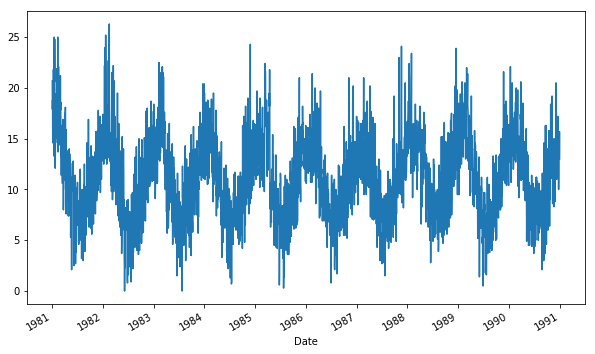

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

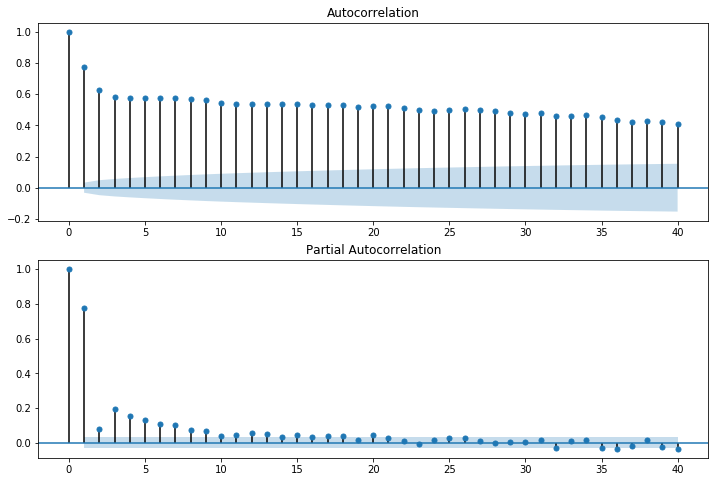

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

# Autoregression Model

In [5]:
from statsmodels.tsa.ar_model import AR

In [6]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [7]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


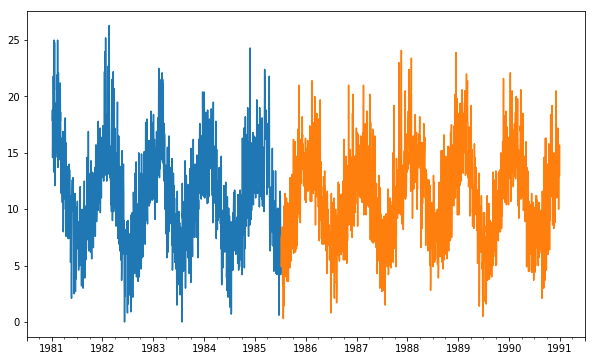

In [8]:
plt.figure(figsize=(10,6));
trainS.ix['1980':].plot()
testS.plot()
plt.show()

In [9]:
print(len(train))
print(len(test))

1646
2001


# Zadanie
Wykonaj predykcję za pomocą modelu AR:
- za pomocą prostej predykcji 
- przeuczając model za każdym razem gdy pojawia się nowy punkt
- nie przeuczając modelu ale używając nowo pojawiających się punktów

In [10]:
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [12]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

from sklearn.metrics import mean_squared_error
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=7.738295, expected=7.500000
predicted=7.747052, expected=4.900000
predicted=7.343110, expected=5.900000
predicted=7.097824, expected=7.800000
predicted=7.093936, expected=5.800000
predicted=7.389590, expected=7.000000
predicted=7.692920, expected=8.400000
predicted=7.955183, expected=6.200000
predicted=7.893243, expected=7.500000
predicted=7.960929, expected=4.800000
predicted=8.182984, expected=3.300000
predicted=8.281968, expected=3.200000
predicted=8.449309, expected=7.000000
predicted=8.281219, expected=8.400000
predicted=8.154464, expected=0.300000
predicted=8.055823, expected=0.300000
predicted=8.002211, expected=2.100000
predicted=8.031101, expected=8.500000
predicted=8.030902, expected=1.400000
predicted=8.078643, expected=4.100000
predicted=8.121020, expected=10.300000
predicted=8.144461, expected=6.600000
predicted=8.155071, expected=6.100000
predicted=8.157473, expected=7.000000
predicted=8.184450, expected=5.100000
predicted=8.220490, expected=6.300000
predicted=8

predicted=10.486512, expected=16.700000
predicted=10.486516, expected=15.300000
predicted=10.486519, expected=14.300000
predicted=10.486522, expected=13.500000
predicted=10.486525, expected=15.000000
predicted=10.486528, expected=13.600000
predicted=10.486531, expected=15.200000
predicted=10.486534, expected=17.000000
predicted=10.486537, expected=18.700000
predicted=10.486540, expected=16.500000
predicted=10.486543, expected=17.400000
predicted=10.486545, expected=18.300000
predicted=10.486548, expected=18.300000
predicted=10.486551, expected=22.400000
predicted=10.486554, expected=21.400000
predicted=10.486556, expected=20.900000
predicted=10.486559, expected=17.600000
predicted=10.486562, expected=15.500000
predicted=10.486564, expected=16.600000
predicted=10.486567, expected=16.200000
predicted=10.486570, expected=15.600000
predicted=10.486572, expected=14.500000
predicted=10.486575, expected=14.000000
predicted=10.486577, expected=15.600000
predicted=10.486580, expected=12.300000


predicted=10.486826, expected=4.600000
predicted=10.486826, expected=11.100000
predicted=10.486826, expected=8.700000
predicted=10.486826, expected=10.000000
predicted=10.486826, expected=11.300000
predicted=10.486826, expected=10.500000
predicted=10.486826, expected=9.900000
predicted=10.486826, expected=11.000000
predicted=10.486826, expected=14.000000
predicted=10.486826, expected=9.200000
predicted=10.486826, expected=9.800000
predicted=10.486826, expected=6.000000
predicted=10.486826, expected=9.800000
predicted=10.486826, expected=9.200000
predicted=10.486826, expected=11.800000
predicted=10.486826, expected=10.300000
predicted=10.486826, expected=7.500000
predicted=10.486826, expected=7.700000
predicted=10.486826, expected=15.800000
predicted=10.486826, expected=14.600000
predicted=10.486826, expected=10.500000
predicted=10.486826, expected=11.300000
predicted=10.486826, expected=10.900000
predicted=10.486826, expected=6.400000
predicted=10.486826, expected=10.900000
predicted=1

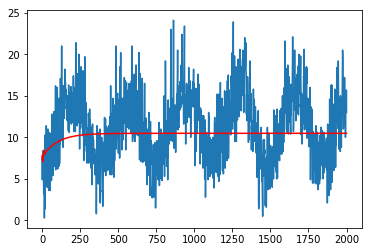

In [13]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [14]:
model = AR(trainS)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 24
Coefficients: [ 0.56691302  0.59994965 -0.10440545  0.07574033  0.01920208  0.06170042
 -0.00326916  0.0512316   0.04582641  0.04371274 -0.01187314 -0.00544799
  0.02191693 -0.00421037  0.06195737 -0.03541854  0.02606062 -0.02014342
  0.03647476  0.0345772   0.00450259  0.02305056  0.00735589  0.00235868
  0.01509072]


In [15]:
model_fit = model.fit()
testS.index

DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')

In [16]:
predictions = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True)
predictions

1985-07-09     8.164979
1985-07-10     8.137249
1985-07-11     7.916977
1985-07-12     7.453769
1985-07-13     7.189459
1985-07-14     7.198919
1985-07-15     7.477094
1985-07-16     7.786770
1985-07-17     8.069249
1985-07-18     8.021870
1985-07-19     8.064157
1985-07-20     8.255817
1985-07-21     8.357122
1985-07-22     8.520817
1985-07-23     8.386297
1985-07-24     8.238178
1985-07-25     8.135671
1985-07-26     8.069439
1985-07-27     8.111722
1985-07-28     8.137661
1985-07-29     8.181042
1985-07-30     8.226856
1985-07-31     8.249380
1985-08-01     8.254479
1985-08-02     8.257864
1985-08-03     8.278814
1985-08-04     8.310957
1985-08-05     8.352570
1985-08-06     8.370820
1985-08-07     8.399684
                ...    
1990-12-01    10.486826
1990-12-02    10.486826
1990-12-03    10.486826
1990-12-04    10.486826
1990-12-05    10.486826
1990-12-06    10.486826
1990-12-07    10.486826
1990-12-08    10.486826
1990-12-09    10.486826
1990-12-10    10.486826
1990-12-11    10

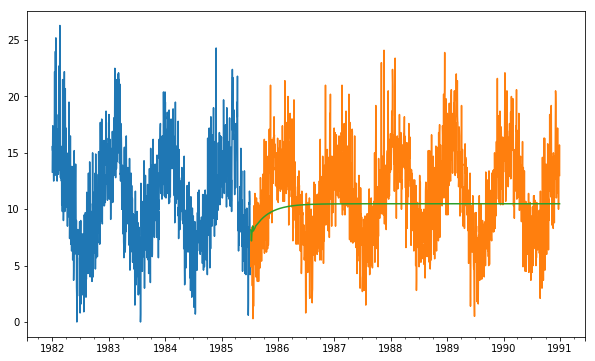

In [17]:
plt.figure(figsize=(10,6));
trainS.loc['1982':].plot()
testS.plot()
predictions.plot()
plt.show()

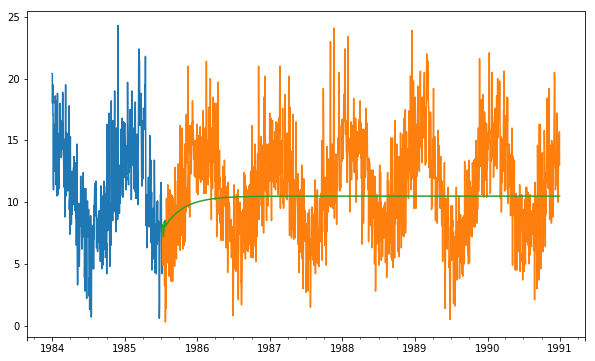

In [18]:
plt.figure(figsize=(10,6));
trainS.loc['1984':].plot()
testS.plot()
predictions.plot()
plt.show()

In [19]:
# polecenia z D15_Z11
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(start=len(history), end=(len(history)+1))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=7.738295, expected=7.500000
predicted=7.602570, expected=4.900000
predicted=5.641968, expected=5.900000
predicted=6.505617, expected=7.800000
predicted=7.452119, expected=5.800000
predicted=6.353841, expected=7.000000
predicted=7.446543, expected=8.400000
predicted=8.251573, expected=6.200000
predicted=6.598147, expected=7.500000
predicted=7.663741, expected=4.800000
predicted=6.029706, expected=3.300000
predicted=5.589981, expected=3.200000
predicted=5.500996, expected=7.000000
predicted=7.376267, expected=8.400000
predicted=7.602015, expected=0.300000
predicted=2.596745, expected=0.300000
predicted=3.532280, expected=2.100000
predicted=4.224756, expected=8.500000
predicted=7.508639, expected=1.400000
predicted=2.342885, expected=4.100000
predicted=5.498982, expected=10.300000
predicted=8.390430, expected=6.600000
predicted=5.725110, expected=6.100000
predicted=5.295464, expected=7.000000
predicted=6.747761, expected=5.100000
predicted=5.636402, expected=6.300000
predicted=6

predicted=13.952028, expected=11.800000
predicted=12.488546, expected=15.800000
predicted=15.077152, expected=16.000000
predicted=14.645945, expected=11.800000
predicted=12.055057, expected=14.500000
predicted=14.234560, expected=10.700000
predicted=11.817143, expected=14.200000
predicted=14.334745, expected=19.500000
predicted=16.734586, expected=21.400000
predicted=17.713789, expected=17.900000
predicted=15.613441, expected=17.400000
predicted=16.275393, expected=12.700000
predicted=13.271640, expected=13.800000
predicted=14.754422, expected=14.000000
predicted=14.292153, expected=15.000000
predicted=15.145712, expected=14.500000
predicted=14.774572, expected=13.100000
predicted=13.796476, expected=11.400000
predicted=12.529609, expected=12.500000
predicted=13.109237, expected=12.000000
predicted=12.893320, expected=13.400000
predicted=13.653095, expected=14.400000
predicted=14.113099, expected=17.700000
predicted=15.776996, expected=13.900000
predicted=13.106201, expected=13.300000


predicted=6.984312, expected=9.000000
predicted=9.177596, expected=6.100000
predicted=7.446897, expected=9.100000
predicted=9.747629, expected=9.600000
predicted=9.246325, expected=6.000000
predicted=6.936372, expected=10.000000
predicted=9.612903, expected=11.000000
predicted=9.510116, expected=6.200000
predicted=7.124505, expected=8.300000
predicted=9.112034, expected=11.300000
predicted=10.375963, expected=11.300000
predicted=9.819235, expected=6.700000
predicted=7.427340, expected=6.600000
predicted=7.856020, expected=11.400000
predicted=10.699341, expected=6.900000
predicted=7.551179, expected=10.600000
predicted=10.391478, expected=8.600000
predicted=8.391898, expected=11.300000
predicted=10.522483, expected=12.500000
predicted=10.533848, expected=9.900000
predicted=9.238393, expected=6.900000
predicted=8.054016, expected=5.500000
predicted=7.739766, expected=7.800000
predicted=8.694044, expected=11.000000
predicted=10.276452, expected=16.200000
predicted=13.035084, expected=9.90

predicted=12.630008, expected=13.700000
predicted=13.297130, expected=14.900000
predicted=13.828892, expected=20.200000
predicted=16.661255, expected=16.300000
predicted=13.985430, expected=13.900000
predicted=13.482458, expected=10.100000
predicted=11.470633, expected=7.300000
predicted=10.414383, expected=14.000000
predicted=14.123097, expected=17.700000
predicted=15.573894, expected=16.300000
predicted=14.386362, expected=10.600000
predicted=11.594157, expected=9.700000
predicted=11.447562, expected=7.800000
predicted=10.043212, expected=10.400000
predicted=11.526729, expected=10.400000
predicted=11.283679, expected=14.100000
predicted=13.634523, expected=7.100000
predicted=9.034875, expected=8.100000
predicted=10.164836, expected=7.800000
predicted=9.487714, expected=10.600000
predicted=11.114840, expected=9.100000
predicted=10.174967, expected=9.000000
predicted=10.565304, expected=11.900000
predicted=11.702239, expected=17.100000
predicted=13.993878, expected=16.800000
predicted=

predicted=17.358959, expected=15.400000
predicted=13.087748, expected=9.600000
predicted=10.718191, expected=10.800000
predicted=12.067599, expected=12.100000
predicted=12.107130, expected=11.000000
predicted=11.477828, expected=12.600000
predicted=12.677383, expected=14.700000
predicted=13.893738, expected=11.100000
predicted=11.208692, expected=10.100000
predicted=11.014327, expected=11.400000
predicted=11.596761, expected=13.000000
predicted=12.778824, expected=11.900000
predicted=11.825902, expected=9.500000
predicted=10.770443, expected=13.500000
predicted=12.953412, expected=15.200000
predicted=13.618574, expected=18.400000
predicted=15.320007, expected=24.100000
predicted=19.152022, expected=14.100000
predicted=12.966637, expected=10.700000
predicted=12.315279, expected=8.700000
predicted=11.155997, expected=13.300000
predicted=13.533694, expected=11.600000
predicted=11.777358, expected=9.900000
predicted=11.449947, expected=10.800000
predicted=12.347733, expected=11.500000
pred

predicted=10.567624, expected=8.700000
predicted=9.663127, expected=9.300000
predicted=10.253540, expected=6.300000
predicted=8.327230, expected=7.800000
predicted=9.459990, expected=10.000000
predicted=10.443522, expected=11.000000
predicted=10.578809, expected=11.100000
predicted=10.800803, expected=12.600000
predicted=11.560298, expected=10.200000
predicted=9.823219, expected=11.100000
predicted=10.682126, expected=8.700000
predicted=9.137382, expected=9.500000
predicted=10.046678, expected=9.700000
predicted=10.126927, expected=8.200000
predicted=9.148836, expected=5.000000
predicted=7.285752, expected=6.500000
predicted=8.477947, expected=12.100000
predicted=11.236354, expected=8.900000
predicted=8.616985, expected=6.100000
predicted=7.517313, expected=2.800000
predicted=5.773459, expected=3.700000
predicted=6.353252, expected=6.800000
predicted=7.740124, expected=6.600000
predicted=7.349489, expected=7.000000
predicted=7.655171, expected=7.300000
predicted=8.086732, expected=7.90

predicted=14.710508, expected=9.500000
predicted=11.839716, expected=12.900000
predicted=14.557260, expected=12.900000
predicted=14.071923, expected=14.800000
predicted=15.200346, expected=14.100000
predicted=14.350484, expected=14.300000
predicted=14.334717, expected=17.400000
predicted=16.076056, expected=18.500000
predicted=16.839855, expected=16.800000
predicted=15.730189, expected=11.500000
predicted=13.161380, expected=9.500000
predicted=12.234417, expected=12.200000
predicted=13.655216, expected=15.700000
predicted=15.026937, expected=16.300000
predicted=15.262829, expected=13.600000
predicted=13.773698, expected=12.600000
predicted=13.705280, expected=13.800000
predicted=14.285991, expected=12.100000
predicted=12.904956, expected=13.400000
predicted=13.786441, expected=17.300000
predicted=15.741494, expected=19.400000
predicted=16.528242, expected=16.600000
predicted=14.863183, expected=13.900000
predicted=14.060925, expected=13.100000
predicted=13.946645, expected=16.000000
pr

predicted=5.734262, expected=7.700000
predicted=6.995897, expected=4.200000
predicted=4.847767, expected=5.500000
predicted=6.035023, expected=9.000000
predicted=7.900134, expected=11.200000
predicted=8.855020, expected=8.000000
predicted=6.884068, expected=7.600000
predicted=7.143625, expected=3.700000
predicted=4.929804, expected=7.500000
predicted=7.519789, expected=8.100000
predicted=7.395998, expected=8.400000
predicted=7.646116, expected=7.100000
predicted=6.957118, expected=7.600000
predicted=7.566228, expected=7.600000
predicted=7.304883, expected=5.600000
predicted=6.028177, expected=7.000000
predicted=6.969256, expected=10.500000
predicted=8.943834, expected=7.300000
predicted=6.860247, expected=7.800000
predicted=7.627401, expected=5.800000
predicted=6.554613, expected=3.800000
predicted=5.630031, expected=5.800000
predicted=6.874526, expected=6.700000
predicted=6.853736, expected=6.600000
predicted=6.864905, expected=6.600000
predicted=6.847764, expected=9.000000
predicted=

predicted=14.237997, expected=16.300000
predicted=15.637061, expected=20.000000
predicted=17.566247, expected=17.000000
predicted=15.669466, expected=15.200000
predicted=15.013027, expected=16.500000
predicted=15.968409, expected=16.500000
predicted=15.698578, expected=17.300000
predicted=16.336640, expected=19.100000
predicted=17.430348, expected=19.300000
predicted=17.547455, expected=17.300000
predicted=16.258961, expected=19.000000
predicted=17.612142, expected=19.800000
predicted=17.846252, expected=19.300000
predicted=17.769041, expected=17.200000
predicted=16.885267, expected=14.200000
predicted=15.238311, expected=10.300000
predicted=13.302258, expected=13.000000
predicted=14.814001, expected=15.300000
predicted=15.640933, expected=15.000000
predicted=15.164005, expected=12.100000
predicted=13.574786, expected=9.200000
predicted=12.021121, expected=11.000000
predicted=13.211906, expected=15.000000
predicted=15.020659, expected=11.600000
predicted=12.493289, expected=11.600000
p

predicted=10.686600, expected=16.300000
predicted=12.547088, expected=9.600000
predicted=8.381722, expected=6.800000
predicted=7.990078, expected=5.200000
predicted=7.344774, expected=10.600000
predicted=10.465546, expected=16.300000
predicted=12.969246, expected=9.800000
predicted=9.063108, expected=4.600000
predicted=6.893006, expected=11.100000
predicted=11.156710, expected=8.700000
predicted=8.558023, expected=10.000000
predicted=10.034805, expected=11.300000
predicted=10.735205, expected=10.500000
predicted=10.248145, expected=9.900000
predicted=9.476944, expected=11.000000
predicted=10.098087, expected=14.000000
predicted=12.069788, expected=9.200000
predicted=9.484439, expected=9.800000
predicted=10.432432, expected=6.000000
predicted=7.605718, expected=9.800000
predicted=10.640309, expected=9.200000
predicted=9.459557, expected=11.800000
predicted=11.056878, expected=10.300000
predicted=9.696326, expected=7.500000
predicted=8.329531, expected=7.700000
predicted=8.805585, expect

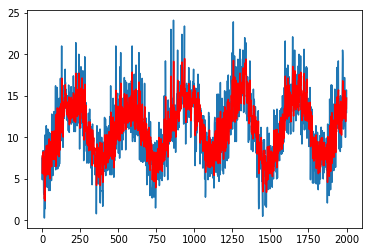

In [20]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [21]:
pre=pd.Series(predictions, index=testS.index)

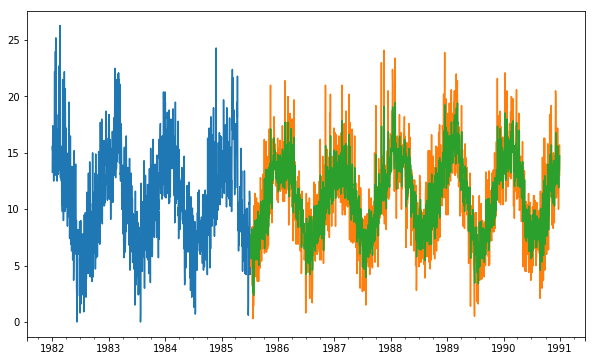

In [23]:
plt.figure(figsize=(10,6));
trainS.loc['1982':].plot()
testS.plot()
pre.plot()
plt.show()